In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris


iris = load_iris()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
iris.data.size

600

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = pd.DataFrame(iris.data)
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Standardize
Xs = (X - X.mean()) / (X.std())

In [6]:
X['initial_label'] = iris.target

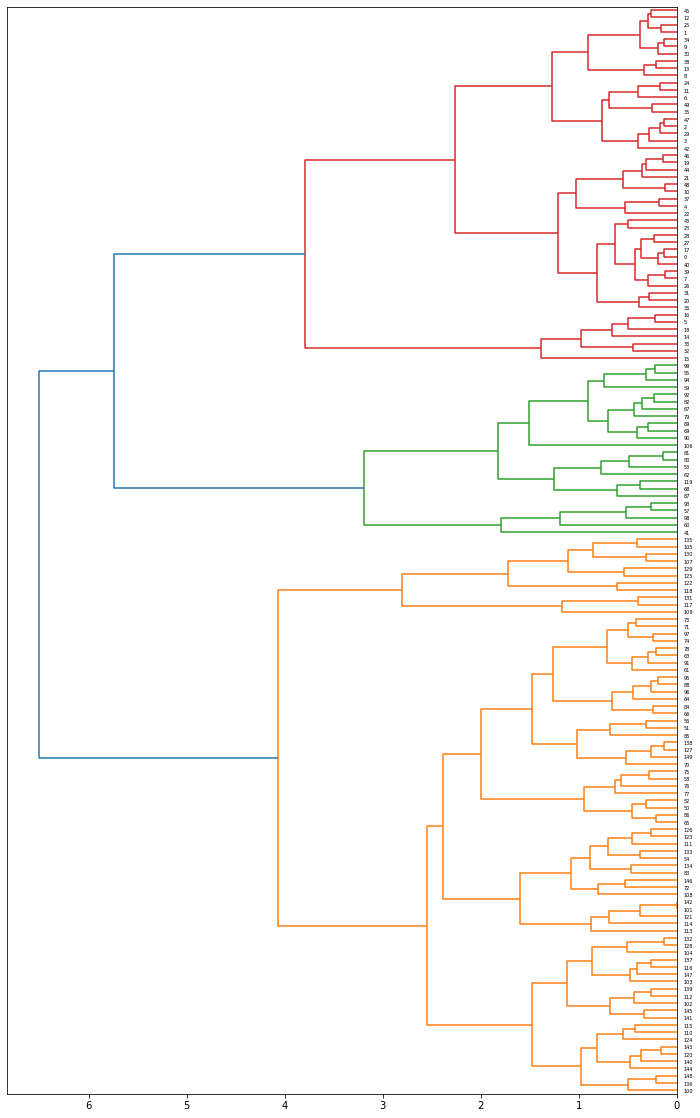

In [7]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

#plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,20)


# перебором параметров method и metric получена такая конфигурация
# которая кажется самой хорошей для трех классов
Z = linkage(Xs, method='complete', metric='euclidean')
# Z[:,0], Z[:,1] - idexes of the  objects
# Z[:,2] - distance
# Z[:,3] - number of elements in claster
dend = dendrogram(Z, orientation='left', 
                  #color_threshold=0.0, labels=df.Name.values
                 )


In [8]:
label = fcluster(Z, 5.0, criterion='distance')
np.unique(label)

array([1, 2, 3], dtype=int32)

In [9]:
# 3 -> 0 
# 2 -> 1
# 1 -> 2
label_ordered_to_taget = np.where(label==3, 0,
                         np.where(label==2, 1, 2))

label_ordered_to_taget

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
X.loc[:, 'model_label'] = label
X.loc[:, 'model_ordered_label'] = label_ordered_to_taget
X.head(-5)

,0,1,2,3,initial_label,model_label,model_ordered_label
0,5.1,3.5,1.4,0.2,0,3,0
1,4.9,3.0,1.4,0.2,0,3,0
2,4.7,3.2,1.3,0.2,0,3,0
3,4.6,3.1,1.5,0.2,0,3,0
4,5.0,3.6,1.4,0.2,0,3,0
...,...,...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,2,1,2
141,6.9,3.1,5.1,2.3,2,1,2
142,5.8,2.7,5.1,1.9,2,1,2
143,6.8,3.2,5.9,2.3,2,1,2


In [11]:
# Сравним начальные метки с фитированием модели
for i, group in X.groupby('initial_label'):
    print('=' * 60)
    print('cluster {}'.format(i))
    print(group)

cluster 0
      0    1    2    3  initial_label  model_label  model_ordered_label
0   5.1  3.5  1.4  0.2              0            3                    0
1   4.9  3.0  1.4  0.2              0            3                    0
2   4.7  3.2  1.3  0.2              0            3                    0
3   4.6  3.1  1.5  0.2              0            3                    0
4   5.0  3.6  1.4  0.2              0            3                    0
5   5.4  3.9  1.7  0.4              0            3                    0
6   4.6  3.4  1.4  0.3              0            3                    0
7   5.0  3.4  1.5  0.2              0            3                    0
8   4.4  2.9  1.4  0.2              0            3                    0
9   4.9  3.1  1.5  0.1              0            3                    0
10  5.4  3.7  1.5  0.2              0            3                    0
11  4.8  3.4  1.6  0.2              0            3                    0
12  4.8  3.0  1.4  0.1              0            3    

In [12]:
# import sys
# !{sys.executable} -m pip install matplotlib_venn

In [13]:
from matplotlib_venn import venn3, venn3_circles

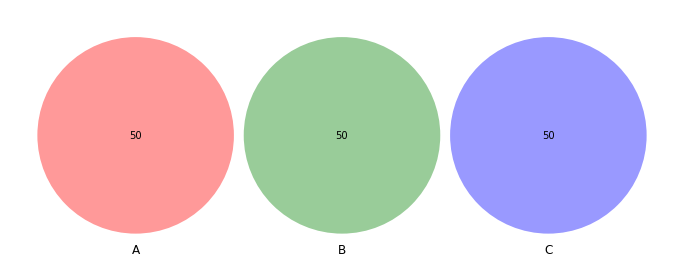

In [14]:
initial_groups = []

for i, group in X.groupby('initial_label'):
    #print(i, group.index)
    initial_groups.append(group.index)
    
venn3([set(initial_groups[0]), set(initial_groups[1]), set(initial_groups[2])])

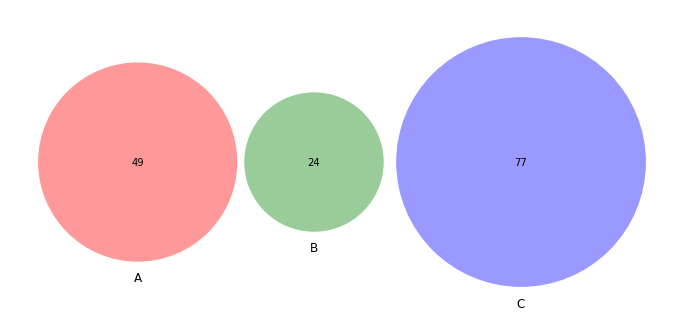

In [15]:
linkage_groups = []

for i, group in X.groupby('model_ordered_label'):
    #print(i, group.index)
    linkage_groups.append(group.index)
    
venn3([set(linkage_groups[0]), set(linkage_groups[1]), set(linkage_groups[2])])

In [16]:
# import sys
# !{sys.executable} -m pip install venn

<AxesSubplot:>

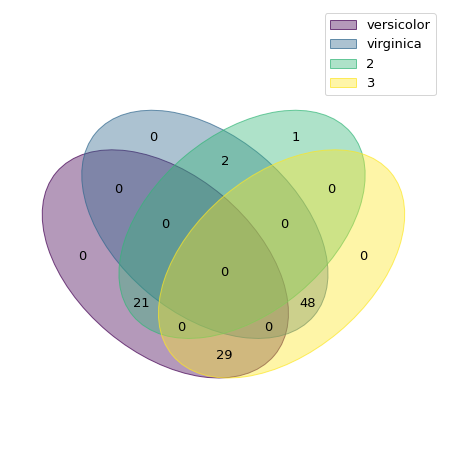

In [17]:
from venn import venn
sets = {
    #iris.target_names[0]: set(initial_groups[0]),
    iris.target_names[1]: set(initial_groups[1]),
    iris.target_names[2]: set(initial_groups[2]),
    #'1': set(linkage_groups[0]),
    '2': set(linkage_groups[1]),
    '3': set(linkage_groups[2])
}
venn(sets)


0 0 0
0 1 1
0 2 2
1 0 3
1 1 4
1 2 5
2 0 6
2 1 7
2 2 8


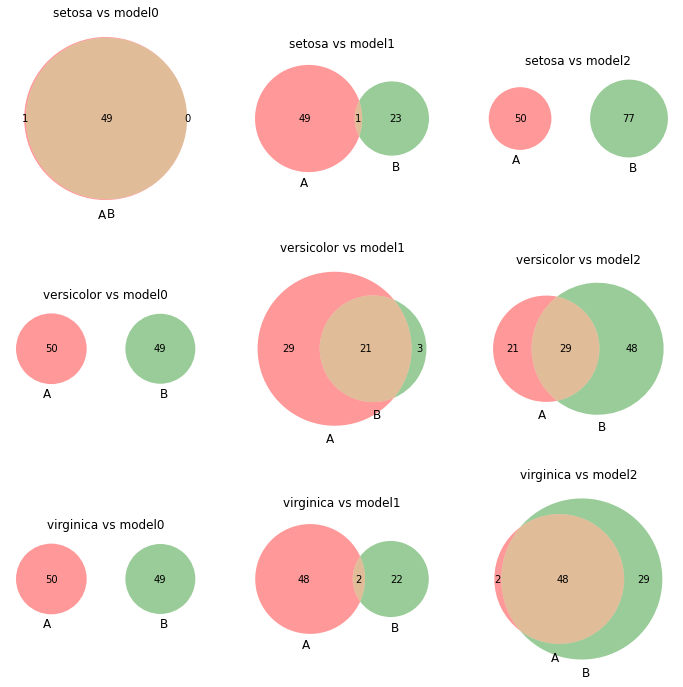

In [18]:
# Найдем пересечения классов из начальной выборки и предсказанными классами
# Составим все возможные комбинации диаграмм Вена

from matplotlib_venn import venn2, venn2_circles

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i, ini in X.groupby('initial_label'):
    ini_set = set(ini.index)
    for l, link in X.groupby('model_ordered_label'):
        print(i,l,i*3+l)
        link_set = set(link.index)
        ax = plt.subplot(3,3,i*3+l+1)
        ax.set_title(iris.target_names[i]+' vs model'+str(l))
        venn2([ini_set, link_set])
        
# versicolor плохо определился 

In [19]:
# METRICS

In [20]:
from sklearn import metrics

print(metrics.rand_score(X['initial_label'], X['model_ordered_label']))
print(metrics.rand_score(X['initial_label'], X['model_label']))

0.8021476510067114
0.8021476510067114


In [21]:
from sklearn.metrics.cluster import pair_confusion_matrix

print(pair_confusion_matrix(X['initial_label'], X['model_ordered_label']))
print(pair_confusion_matrix(X['initial_label'], X['model_label']))

[[12086  2914]
 [ 1508  5842]]
[[12086  2914]
 [ 1508  5842]]


In [22]:
methods = ['single', 'complete', 'average', 'weighted','centroid', 'median', 'ward']
metrics=['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 
         'hamming', 'jaccard', 'jensenshannon', 'kulczynski1', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 
         'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule']